### 01 Manipulating matrices (creating, filling, accessing elements, ROIs)

- 행렬의 생성 및 초기화, 픽셀과 요소에 대한 접근, 행렬을 사용해 작업하는 방법

1. 필요한 모듈 가져오기

In [2]:
import cv2
import numpy as np

2. 특정 형태로 행렬을 생성하고 값을 255로 채운다 --> 흰색화면

In [3]:
image = np.full((480, 640, 3), 255, np.uint8)
cv2.imshow('white', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
image = np.full((480, 640, 3), 0, np.uint8) # 검정화면
cv2.imshow('black', image)
cv2.waitKey()
cv2.destroyAllWindows()

3. 행렬을 만들고 각 개별 픽셀 색의 값을 적생으로 지정

In [6]:
image = np.full((480, 640, 3), (0, 0, 255), np.uint8)
cv2.imshow('red', image)
cv2.waitKey()
cv2.destroyAllWindows()

4. 일부 픽셀의 값을 흰색으로 설정

In [11]:
image[240,160] = image[240,320] = image[240,480] = (255,255,255)
image[240,180] = (255,255,255)
cv2.imshow('black with withe pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

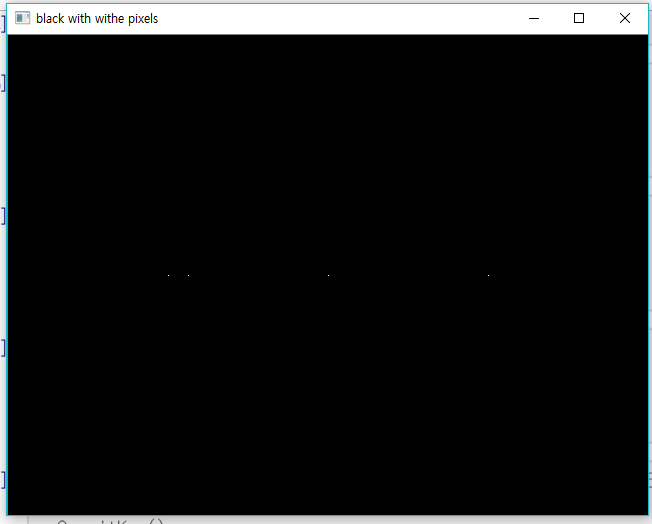

5. 모든 픽셀의 첫 번째 채널을 255로 설정해 검정색을 파란색으로 만들기

In [12]:
image[:, :, 0] = 255
cv2.imshow('blue with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

6. 이미지 중간에 있는 세로선의 픽셀을 흰색으로 설정하기

In [13]:
image[ : , 100 , :] = 255
cv2.imshow('blue with white line', image)
cv2.waitKey()
cv2.destroyAllWindows()

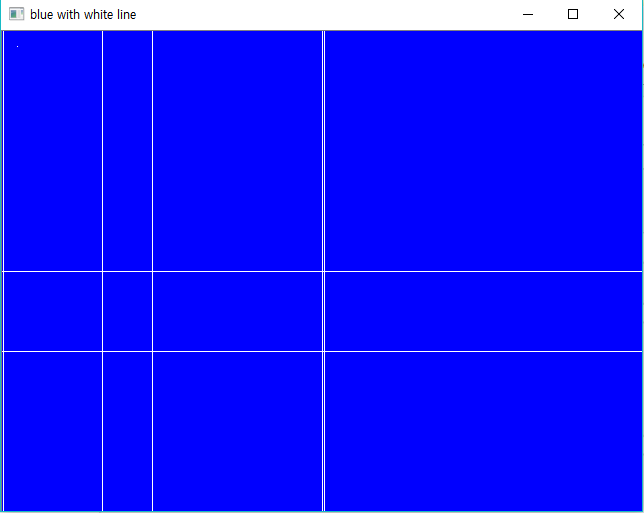

7. 마지막으로 특정 영역 내 모든 픽셀의 두 번째 채널을 255로 설정하기

In [14]:
image[100:600, 100:200, 2] = 255
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [23]:
image[300:500, 200:300, 2] = 200
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


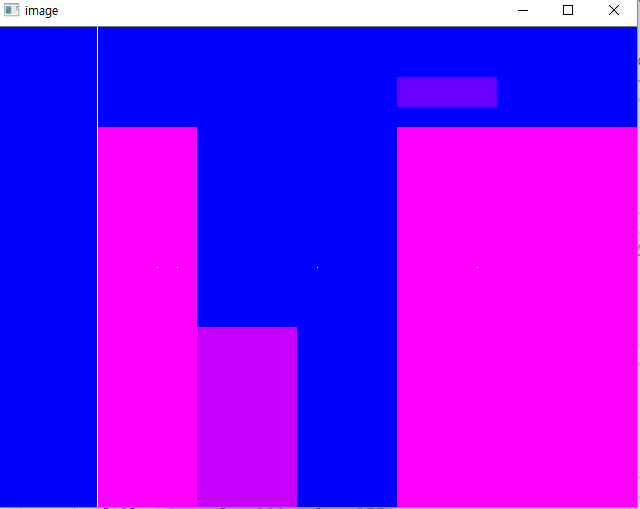

- OpenCV의 파이썬 인터페이스에서 행렬은 Numpy 배열로 나타낸다
- Numpy는 다차원 행렬(텐서)을 다루는 강력하고 사용이 간결한 도구를 제공한다
    - 물론 numpy는 일반적인 2차원 행렬을 지원
- 행렬은 '형태'와 '요소' 타입의 두 가지 독립적인 특성이 있다. 

1. 형태: 행렬의 모든 차원을 의미
    - 일반적으로 너비(열의 수), 높이(행의 수), 채널수 의 세 가지 공간 차원을 갖는다
    - 일반적으로 높이, 너비, 채널 순서의 형식을 사용
    - OpenCV는 풀 컬러 또는 크레이스케일 행렬로 동작함
    - --> OpenCV의 루틴은 3채널 또는 1채널만 처리할 수 있다
    - 그레이스케일 행렬은 숫자의 평면 테이블로 생각가능
    - 각 요소(픽셀)는 하나의 값만 저장한다
    - 풀 컬러는 각 요소가 하나가 아니라 세개의 값을 연속적으로 저장하는 테이블
    - 풀 컬러 행렬 매트릭스의 예로 적색, 녹색, 청색 채널을 갖는 행렬이 있으며,
    - 이 행렬은 각각의 요소가 해당 색에 대한 값을 갖는다는것을 의미
    - OpenCV는 역사적 이유로 RGB 표현말고 BGR 형식으로 저장(주의필요)

2. 요소타입: 요소의 값을 나타내기 위해 사용하는 데이터 타입을 정의
    - 예를들어 각 픽셀이 [0-255] 범위의 값을 저장할 떄의 요소 타입은 np.uint8이다
    - 또한 요소 타입으로 np.float32, np.float64로 값을 저장할 수 있다.
    - np.full은 행렬을 생성하기 위해 사용되며
    - (높이, 너비, 채널) 형식의 행렬 형태, 
    - 각 픽셀(또는 픽셀의 각 구성 요소)에 대한 초깃값,
    - 픽셀 값의 타입을 매개변수로 받는다
    - 초깃값 매개변수에 단일 숫자를 전달하면 모든 픽셀이 해당 숫자로 초기화 된다
    - 각 픽셀 요소에 초기 숫자를 개별적으로 전달도 가능
    - np.fill 을 사용해 모든 픽셀에 매개변수로 전달되는 값을 동일하게 할당도 가능
    - np.fill 은 행렬을 새로 생성하지 않고 기존 행렬의 요소에 값을 할당하는 것..이 np.full과의 차이점
 

- 픽셀에 개별적으로 접근하기 위해서는 원하는 요소의 인덱스를 명시해 [] 연산자를 사용
    - image[240,160] 은 높이 240, 너비 160에 있는 픽셀에 대한 접근을 의미
- 첫 번째 인덱스는 첫번째 차원, 두번째 인덱스는 두번째 차원
- 일부 차원에 대해서만 인덱스를 명시하면 슬라이스(차원이 낮은 텐서)를 얻는다
- 특정 차원에 해당하는 모든 픽셀을 처리하기 위해 인덱스를 명시하는 대신에 콜론(:)을 사용
    - image[100:600, 100:200, 2]는 [100:600] 범위의 높이 인덱스, [100:200] 범위의 너비 인덱스에
    - 해당하는 모든 픽셀의 채널 인덱스가 2에 해당하는 영역을 의미